In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
os.chdir(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025")
import torch.nn as nn
import torch
from torch.utils.data import TensorDataset, DataLoader, Dataset, random_split
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from PIL import Image
import os
from pathlib import Path
import re

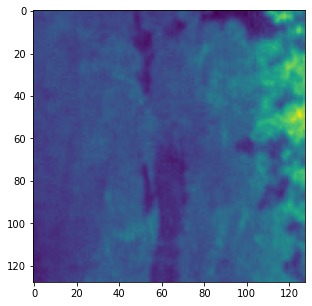

In [252]:
sample = np.load("sample2722.npy")
#sample = sample.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[2]):
    ax.imshow(sample[:, :, channel])

In [197]:
sample.shape

(128, 128, 125)

In [282]:
means = np.zeros((125, 2723))
stds = np.zeros((125, 2723))
max_channel = np.zeros(125)
items_faulty = []
for img_name in os.listdir(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot"):
    try:
        image = np.load(Path(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot") / img_name).astype(float)
    except ValueError:
        print(f"Faulty image: {img_name}")
        items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
        continue
    image = image.transpose(2, 1, 0)
    item = int(re.findall(r'\d+', img_name)[0])
    for channel in range(125):
        means[channel, item] = image[channel, :, :].mean()
        stds[channel, item] = image[channel, :, :].std()
        max_channel[channel] = max(max_channel[channel], image[channel, :, :].max())
means, stds = np.delete(means, items_faulty, axis=1), np.delete(stds, items_faulty, axis=1)
means, stds = means.mean(axis=1) / max_channel, stds.mean(axis=1) / max_channel

Faulty image: sample2451.npy


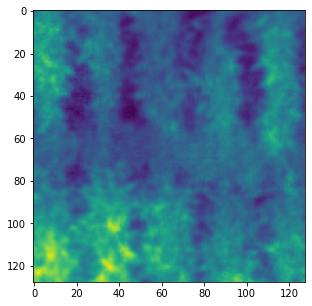

In [58]:
sample1 = np.load("sample2678.npy")
sample1 = sample1.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample1.shape[0]):
    ax.imshow(sample1[channel, :, :])

In [60]:
sample.shape

(125, 128, 128)

In [327]:
transform = transforms.Compose([
    # transforms.Resize((128, 128)), 
    # transforms.ToTensor(), 
    # transforms.Normalize(mean=means[0],
    #                     std=stds[0]),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=45.0)
])

In [ ]:
# sample = np.load("sample2722.npy")
# sample = sample.transpose(2, 1, 0)
torch.tensor(sample, dtype=torch.float)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


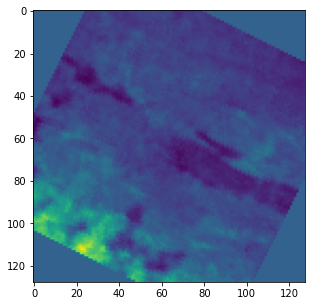

In [352]:
sample_transformed = transform(torch.tensor(sample, dtype=torch.float))
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample_transformed[channel, :, :])
print(sample_transformed[120])

In [382]:
sample = np.load("sample2722.npy").astype(float)
sample = sample.transpose(2, 1, 0)
((sample[102] / max_channel[102] - means[102]) / stds[102])

array([[-0.87050938, -0.78946249, -0.91508517, ..., -0.55645267,
        -0.45919639, -0.4510917 ],
       [-0.7813578 , -0.75299138, -0.91103283, ..., -0.48553663,
        -0.4733796 , -0.55442649],
       [-0.66991832, -0.75096521, -0.79959335, ..., -0.67194449,
        -0.81580273, -0.59292377],
       ...,
       [ 1.01180473,  0.46676437, -0.02154317, ..., -0.70436325,
        -0.6638398 , -0.34370457],
       [ 0.62683199,  0.4282671 ,  0.07773928, ..., -0.82998593,
        -0.78946249, -0.62331635],
       [ 0.43637179, -0.12487796, -0.19984633, ..., -0.49971984,
        -0.92521603, -1.01436762]])

[[-0.9807131  -0.90615039 -1.02032455 ... -0.90149022 -0.81760716
  -0.8106169 ]
 [-0.89683005 -0.87119911 -1.01799446 ... -0.83158767 -0.81993724
  -0.89683005]
 [-0.79430631 -0.86886903 -0.91314064 ... -0.9201309  -1.04595548
  -0.85022835]
 ...
 [ 0.9043256   0.37306624 -0.06731981 ... -0.86653894 -0.83158767
  -0.49139527]
 [ 0.61306499  0.35675564  0.07481537 ... -0.92479107 -0.88750971
  -0.68246223]
 [ 0.36840607 -0.12091177 -0.24207618 ... -0.63586054 -1.02265463
  -1.05993599]]


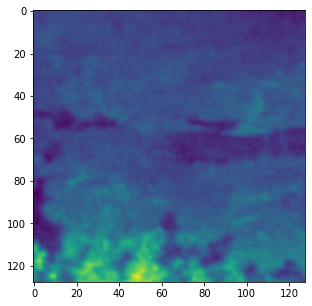

In [351]:
sample = np.load("sample2722.npy").astype(float)
sample = sample.transpose(2, 1, 0)
for channel in range(sample.shape[0]):
    sample[channel] = (sample[channel] / max_channel[channel] - means[channel]) / stds[channel]
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample[channel, :, :])
print(sample[120])

In [298]:
df = pd.read_csv("train.csv")
df

,id,label
0,sample697.npy,7
1,sample54.npy,81
2,sample2270.npy,4
3,sample1401.npy,99
4,sample1901.npy,43
...,...,...
2172,sample2476.npy,40
2173,sample1988.npy,54
2174,sample2018.npy,40
2175,sample2166.npy,15


In [5]:
class AgriImageDataset(Dataset):
    def __init__(self, root_dir, num_channels, transform=None):
        self.root_dir = Path(root_dir)
        self.train_dir = Path(self.root_dir) / "ot" / "ot"
        self.num_channels = num_channels
        self.__extract_means_std_max__()
        self.transform = transform
        self.samples = []
        labels = pd.read_csv(self.root_dir / "train.csv")
        for label in labels.values:
            if int(re.findall(r'\d+', label[0])[0]) in self.items_faulty:
                continue
            self.samples.append((self.train_dir / label[0], label[1]))
                    
    def __extract_means_std_max__(self):
        self.means = np.zeros((self.num_channels, 2723))
        self.stds = np.zeros((self.num_channels, 2723))
        self.max_channel = np.zeros(self.num_channels)
        self.items_faulty = []
        for img_name in os.listdir(self.train_dir):
            try:
                image = np.load(self.train_dir / img_name).astype(float)
            except ValueError:
                print(f"Faulty image: {img_name}")
                self.items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
                continue
            image = image.transpose(2, 1, 0)
            # Check if image is just full of zeros
            if (image == 0).all():
                print(f"Faulty image: {img_name}")
                self.items_faulty.append(int(re.findall(r'\d+', img_name)[0]))
                continue
            item = int(re.findall(r'\d+', img_name)[0])
            for channel in range(self.num_channels):
                self.means[channel, item] = image[channel, :, :].mean()
                self.stds[channel, item] = image[channel, :, :].std()
                self.max_channel[channel] = max(self.max_channel[channel], image[channel, :, :].max())
        self.means, self.stds = np.delete(self.means, self.items_faulty, axis=1), np.delete(self.stds, self.items_faulty, axis=1)
        self.means, self.stds = self.means.mean(axis=1) / self.max_channel, self.stds.mean(axis=1) / self.max_channel

    def __normalize__(self, image):
        for channel in range(self.num_channels):
            image[channel] = (image[channel] / self.max_channel[channel] - self.means[channel]) / self.stds[channel]
        return image
        
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        img_path, value = self.samples[idx]
        image = np.load(img_path).astype(float)
        image = image.transpose(2, 1, 0)
        image = self.__normalize__(image)
        
        if self.transform:
            image = self.transform(torch.tensor(image, dtype=torch.float))
            
        return image, torch.tensor(value, dtype=torch.int)

In [12]:
dataset = AgriImageDataset(root_dir=r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025", num_channels=125, transform=None)

Faulty image: sample1.npy
Faulty image: sample1004.npy
Faulty image: sample1006.npy
Faulty image: sample1009.npy
Faulty image: sample1020.npy
Faulty image: sample1069.npy
Faulty image: sample1070.npy
Faulty image: sample1071.npy
Faulty image: sample1073.npy
Faulty image: sample1076.npy
Faulty image: sample1087.npy
Faulty image: sample1138.npy
Faulty image: sample1140.npy
Faulty image: sample1143.npy
Faulty image: sample1154.npy
Faulty image: sample1205.npy
Faulty image: sample1207.npy
Faulty image: sample1210.npy
Faulty image: sample1271.npy
Faulty image: sample1272.npy
Faulty image: sample1274.npy
Faulty image: sample1277.npy
Faulty image: sample1288.npy
Faulty image: sample133.npy
Faulty image: sample1338.npy
Faulty image: sample1339.npy
Faulty image: sample1341.npy
Faulty image: sample1344.npy
Faulty image: sample135.npy
Faulty image: sample1355.npy
Faulty image: sample138.npy
Faulty image: sample1405.npy
Faulty image: sample1406.npy
Faulty image: sample1408.npy
Faulty image: sample

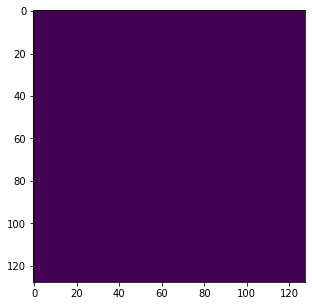

In [6]:
sample = np.load(r"C:\Users\User\OneDrive\Документы\Kaggle\kaggle\AI for agriculture 2025\ot\ot\sample9.npy")
sample = sample.transpose(2, 1, 0)
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sample.shape[0]):
    ax.imshow(sample[channel, :, :])

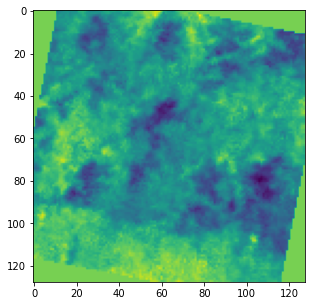

In [10]:
sampled_image = dataset.__getitem__(1900)[0]
fig, ax = plt.subplots(figsize=(10, 5))
for channel in range(sampled_image.shape[0]):
    ax.imshow(sampled_image[channel, :, :])

In [503]:
dataset.__len__()

1990

In [14]:
train_ds, val_ds = random_split(dataset, [0.9, 0.1])
print(len(train_ds), len(val_ds))

1791 199


In [15]:
transform_train = transforms.Compose([
            transforms.Resize((128, 128)), 
            transforms.RandomHorizontalFlip(p=0.5),
            transforms.RandomVerticalFlip(p=0.5),
            transforms.RandomRotation(degrees=45.0)
])
transform_val = transforms.Compose([
            transforms.Resize((128, 128)), 
])
train_ds.dataset.transform = transform_train
val_ds.dataset.transform = transform_val